Explore and visualize seasonality or predict upcoming sales trends

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r'..\data\CleanedSalesData.csv')

In [25]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='ME'))['Sales'].sum().reset_index()
monthly_sales.head()

,Order Date,Sales
0,2014-01-31,14236.895
1,2014-02-28,4519.892
2,2014-03-31,55691.009
3,2014-04-30,28295.345
4,2014-05-31,23648.287


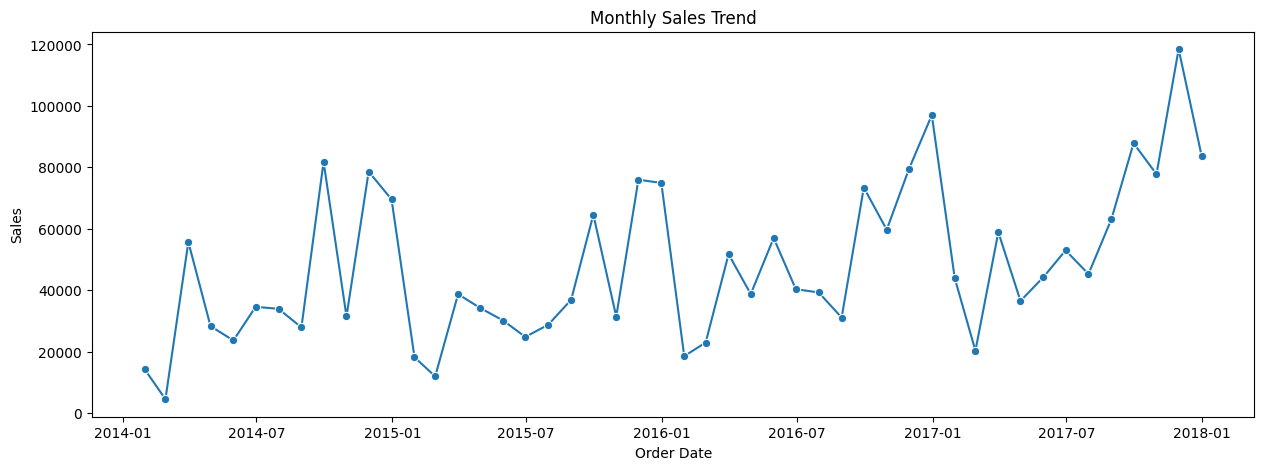

In [46]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Order Date', y='Sales', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.show()

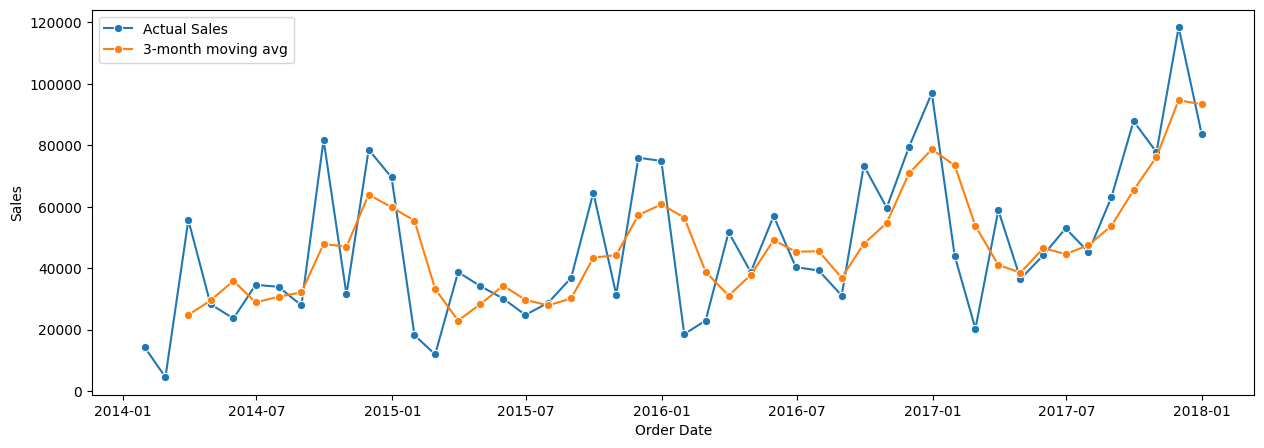

In [47]:
plt.figure(figsize=(15,5))
monthly_sales['Forecast'] = monthly_sales['Sales'].rolling(window=3).mean()
sns.lineplot(x='Order Date', y='Sales', data=monthly_sales, marker='o', label='Actual Sales')
sns.lineplot(x='Order Date', y='Forecast', data=monthly_sales, marker='o', label='3-month moving avg')
plt.legend()
plt.show()